Import libraries.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import data.

In [ ]:
df=pd.read_csv('gdrive/My Drive/Colab Notebooks/test.csv')
df

,2021-12-20 09:42:33,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.104,0.105,0.106,0.107,0.108,0.109,0.110,0.111,0.112,0.113,0.114,0.115,0.116,0.117,0.118,0.119,0.120,0.121,0.122,0.123,0.124,0.125,0.126,0.127,0.128,0.129,0.130,0.131,0.132,0.133,0.134,0.135,0.136,0.137,0.138,0.139,0.140,0.141,0.142,0.143
0,2021-12-20 09:43:58,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2021-12-20 09:44:32,0,10135,12433,10699,91175,17146,5533,7742,21096,20269,93455,86033,72354,0,12423,70854,40818,14800,6543,39155,14941,8168,68776,67397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,14883,9875,7164,11121,108148,14918,7448,17999,25185,0,124544,72148,104074,8753,12905,6104,45712,18041,6766,109244,114665,7867,0,17546,121998,11046,118149,16190,118341,15502,16162,109581,14591,19945,9564,0
2,2021-12-20 09:45:06,0,15391,38283,19497,144718,29531,11481,13371,31468,162721,155244,147769,116795,0,18554,115937,116340,25602,9411,120462,24242,27431,119634,113098,12153,15750,0,12103,5738,18114,5841,14749,8969,21453,76151,9536,0,0,0,...,0,0,0,0,16435,13715,11064,172169,217664,89382,10882,36676,28175,0,213174,118748,197321,12543,24154,11642,117227,91830,13133,216648,207083,8675,0,19887,230100,16421,246843,13258,249268,15432,30040,211507,26864,40090,10981,0
3,2021-12-20 09:45:40,0,15003,40601,17428,163771,152552,11354,13790,14777,162296,153452,154825,117082,0,18936,116313,119014,22057,9256,122534,9027,17843,119532,121309,17033,16064,0,13907,9042,14860,7002,13427,9103,21264,78663,15169,0,0,0,...,0,42588,15268,22996,27229,13423,12526,220973,221466,211683,11980,39028,17289,0,214510,127825,201414,12469,21970,16020,130582,212729,13134,214077,213592,12847,0,24936,232434,14262,245230,15728,253118,17745,32575,256010,27349,41391,20956,0
4,2021-12-20 09:46:15,0,14459,49892,16624,161798,158442,10034,13338,15083,155362,152735,154596,116150,0,125885,115852,103469,22874,8691,120985,6623,13591,120135,118266,9458,15826,0,13885,9219,13410,6736,11362,14772,20822,71887,20354,0,0,0,...,0,42092,15008,29575,30589,12744,12255,49112,224413,160818,13673,38386,45352,0,214272,121277,200284,12138,16730,14576,121054,157624,13066,216055,215500,16137,0,31942,227329,14640,226697,27789,254922,27927,32601,252887,28232,41429,18240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,2021-12-20 18:03:23,0,14478,60662,12790,162764,160551,11125,12757,15615,103586,152681,146779,115967,0,126393,116164,116037,12168,8840,118019,21202,14523,119649,119453,16021,7686,0,10412,8974,11744,6467,13099,11734,7844,78094,18641,12382,16774,22885,...,0,7588,15094,21743,21630,13885,9383,219314,218221,83480,8568,36990,39007,0,213668,127732,206433,15988,16965,14540,126342,95314,13331,213436,213776,17369,0,30706,232053,19744,250663,15670,255408,32776,31610,253300,27166,39944,20234,0
881,2021-12-20 18:03:57,0,14200,52483,16612,162422,152576,10329,13198,35642,159288,154140,153449,115525,0,126665,116632,95165,17154,8431,119966,6351,26346,118021,119548,8553,7282,0,9576,9342,11857,6430,13624,10541,7898,72456,13875,21094,16685,20231,...,0,7808,15130,17259,37228,14688,10029,50092,219081,210301,10097,38372,23809,0,213672,119402,204626,15955,50940,16779,137263,219187,13333,215092,213094,16095,0,29369,241863,18489,243438,25984,256508,23046,31567,254516,28574,38888,19059,0
882,2021-12-20 18:04:31,0,14239,40933,12749,162360,38656,9488,12755,36051,159769,152681,154136,116642,0,78444,116483,114566,13254,8240,120912,5993,17513,119645,115391,6585,7282,0,9942,8974,18304,6430,14138,9921,7844,65950,14552,16521,17

Remove time column.

In [ ]:
df.shape

(885, 145)

In [ ]:
first_column = df.columns[0]
df = df.drop([first_column], axis=1)
data_columns = list(df.columns.values)
dataset = df[data_columns].values.astype('float32')
dataset

array([[     0.,      0.,      0., ...,      0.,      0.,      0.],
       [     0.,  10135.,  12433., ...,  19945.,   9564.,      0.],
       [     0.,  15391.,  38283., ...,  40090.,  10981.,      0.],
       ...,
       [     0.,  14239.,  40933., ...,  40893.,  19496.,      0.],
       [     0.,  14202.,  94502., ...,  40317.,  20481.,      0.],
       [     0.,  14262., 117489., ...,  41418.,  18795.,      0.]],
      dtype=float32)

In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.8)
#train_size=263
test_size = len(dataset) - train_size
train_data = dataset[0:train_size,:]
test_data = dataset[train_size:len(dataset),:]
test_data

array([[0.        , 0.90164036, 0.44063938, ..., 0.9400388 , 0.8713876 ,
        0.        ],
       [0.        , 0.98948157, 0.33815408, ..., 0.9750639 , 0.96799964,
        0.        ],
       [0.        , 0.9221763 , 0.37436718, ..., 0.90466124, 0.855035  ,
        0.        ],
       ...,
       [0.        , 0.8914976 , 0.29393432, ..., 0.90080625, 0.9161224 ,
        0.        ],
       [0.        , 0.889181  , 0.67860603, ..., 0.8881179 , 0.96240777,
        0.        ],
       [0.        , 0.8929376 , 0.8436726 , ..., 0.91237116, 0.88318217,
        0.        ]], dtype=float32)

Create train dataset and test dataset

In [ ]:
def create_dataset(dataset):
    dataX, dataY = [], []
    for i in range(len(dataset)-10):
	    a = dataset[i:i+10, :]
	    dataX.append(a)
	    dataY.append(dataset[i + 10, :])
    return np.array(dataX), np.array(dataY)


trainX, trainY = create_dataset(train_data)
testX, testY = create_dataset(test_data)

Create model

In [ ]:
lstm_model = Sequential()
lstm_model.add(LSTM(500,input_shape=(trainX.shape[1], trainX.shape[2]), activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(500, activation='relu'))
lstm_model.add(Dense(144, activation='relu'))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 500)               1290000   
                                                                 
 dense_12 (Dense)            (None, 500)               250500    
                                                                 
 dense_13 (Dense)            (None, 500)               250500    
                                                                 
 dense_14 (Dense)            (None, 500)               250500    
                                                                 
 dense_15 (Dense)            (None, 500)               250500    
                                                                 
 dense_16 (Dense)            (None, 500)               250500    
                                                                 
 dense_17 (Dense)            (None, 144)              

In [ ]:
lstm_3=lstm_model.fit(trainX, trainY, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
70/70 [==============================] - 5s 66ms/step - loss: 0.0521 - val_loss: 0.0543
Epoch 2/20
70/70 [==============================] - 5s 68ms/step - loss: 0.0523 - val_loss: 0.0535
Epoch 3/20
70/70 [==============================] - 5s 68ms/step - loss: 0.0519 - val_loss: 0.0534
Epoch 4/20
70/70 [==============================] - 5s 68ms/step - loss: 0.0519 - val_loss: 0.0534
Epoch 5/20
70/70 [==============================] - 5s 68ms/step - loss: 0.0518 - val_loss: 0.0533
Epoch 6/20
70/70 [==============================] - 5s 67ms/step - loss: 0.0513 - val_loss: 0.0470
Epoch 7/20
70/70 [==============================] - 5s 66ms/step - loss: 0.0455 - val_loss: 0.0471
Epoch 8/20
70/70 [==============================] - 5s 67ms/step - loss: 0.0455 - val_loss: 0.0470
Epoch 9/20
70/70 [==============================] - 5s 69ms/step - loss: 0.0454 - val_loss: 0.0470
Epoch 10/20
70/70 [==============================] - 5s 67ms/step - loss: 0.0433 - val_loss: 0.0424
Epoch 11/

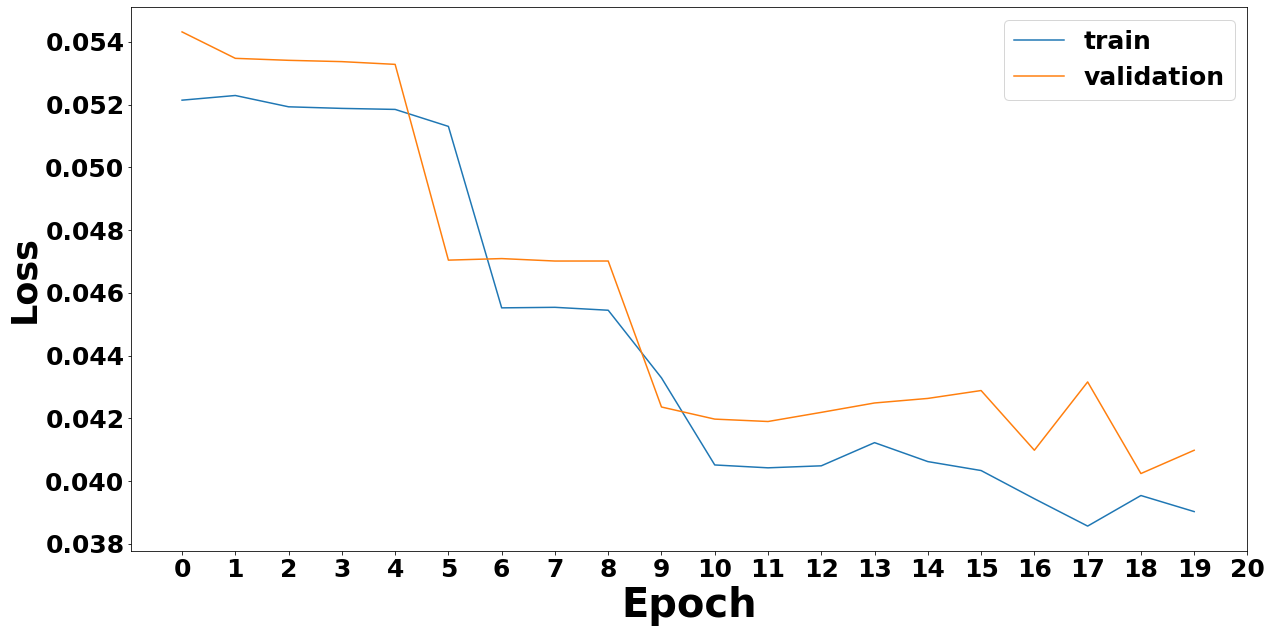

In [ ]:
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 25, 'font.weight' : 'bold'})
plt.plot(lstm_3.history['loss'], label='train')
plt.plot(lstm_3.history['val_loss'], label='validation')
plt.ylabel('Loss', fontweight='bold', fontsize=35)
plt.xlabel('Epoch', fontweight='bold', fontsize = 40)
plt.xticks(range(0,21))
plt.legend()
plt.show()

Predict 

In [ ]:
predY = lstm_model.predict(testX)


Calculate MSE

In [ ]:
mse = mean_squared_error(predY, testY)
print('MSE: %.5f' % mse)

MSE: 0.04135


In [ ]:
inv_predY=scaler.inverse_transform(predY)
inv_predY.shape
inv_testY=scaler.inverse_transform(testY)
inv_predY_0 = inv_predY[10,:]
inv_predY_0.shape

(144,)

In [ ]:
inv_testY_0 = inv_testY[10,:]
inv_testY_0.shape

(144,)

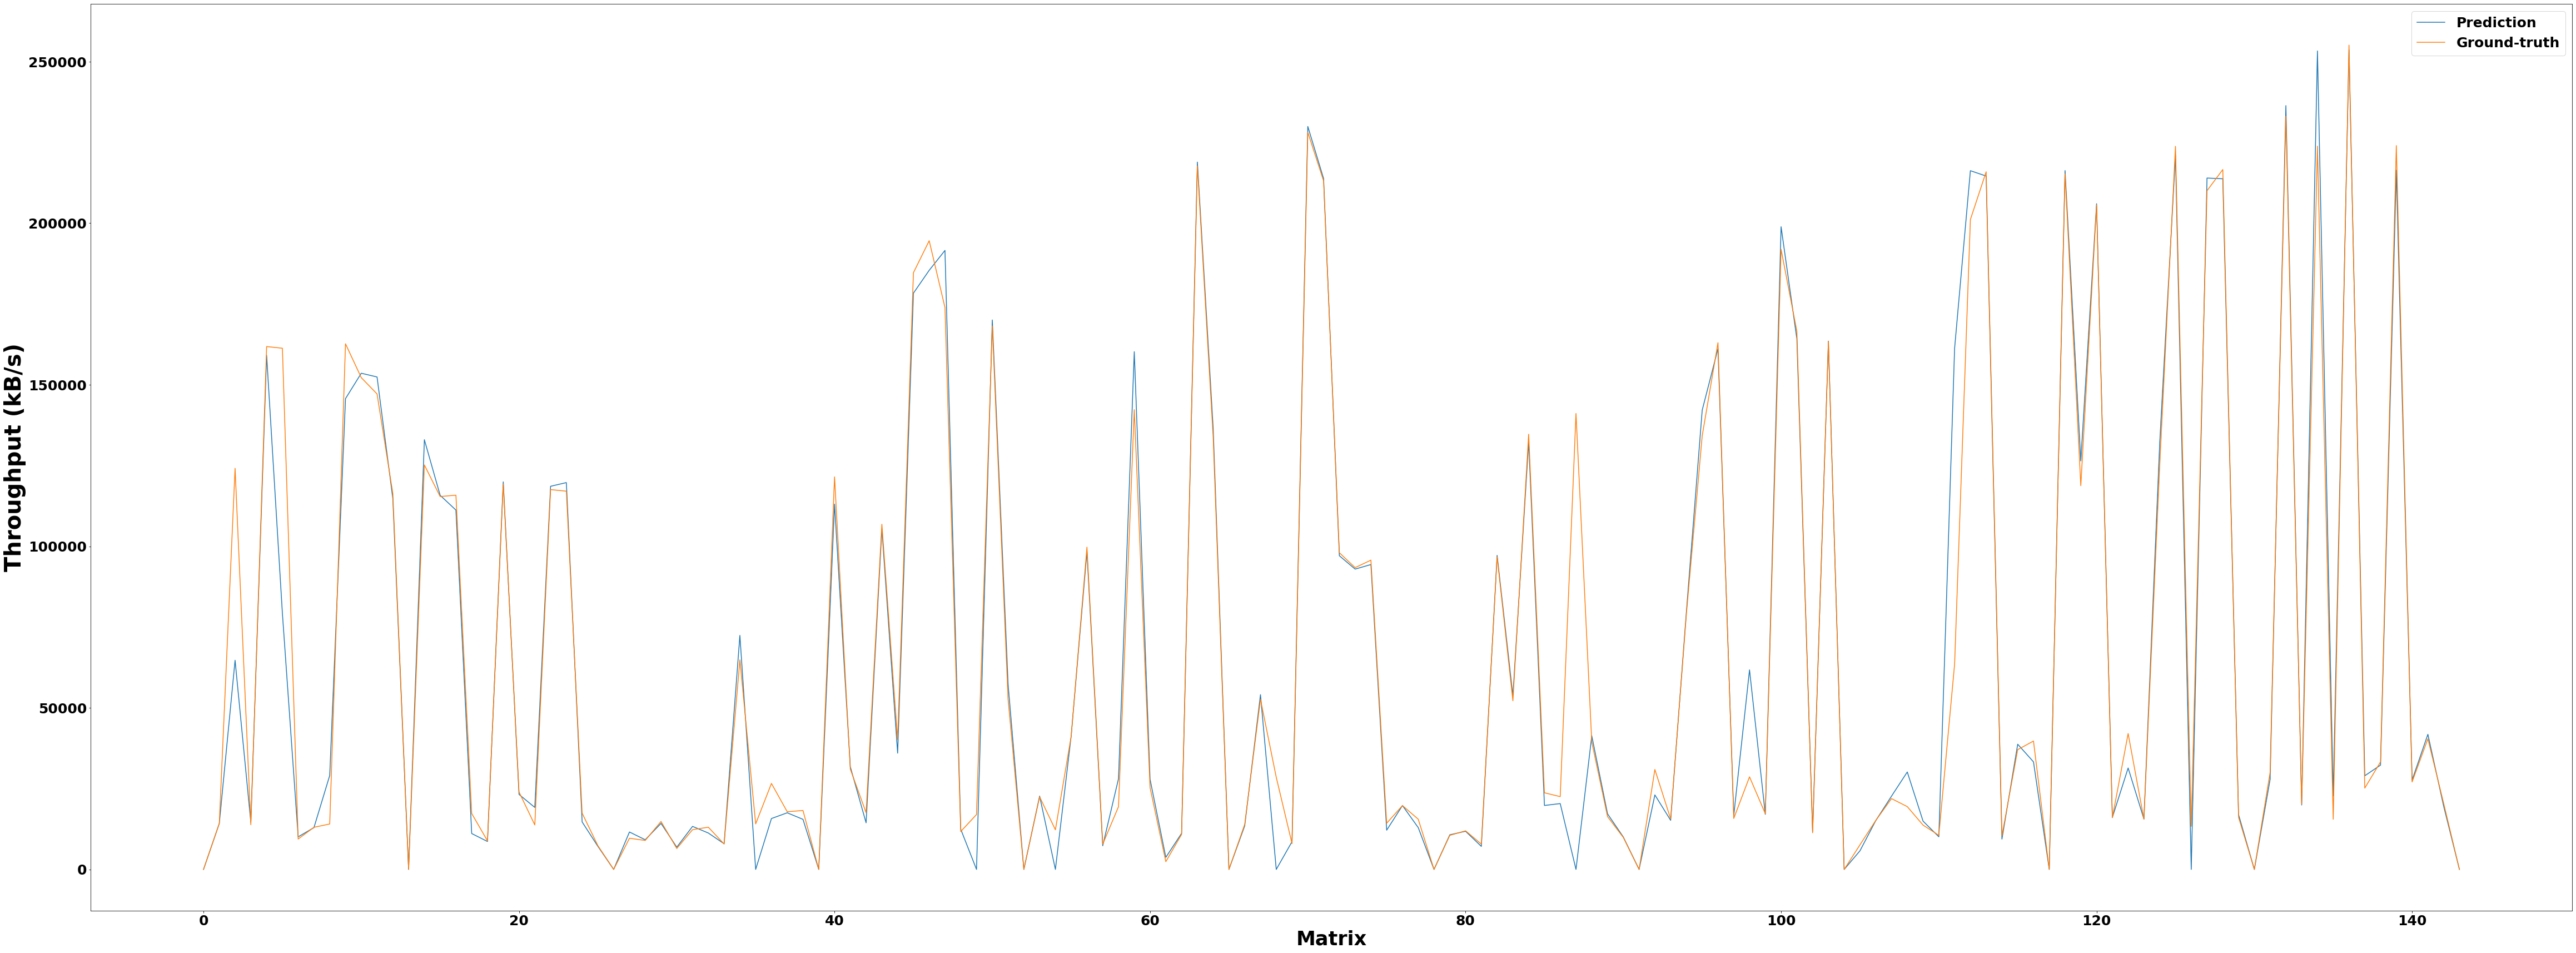

In [ ]:
plt.rcParams["figure.figsize"] = (80,30)
plt.rcParams.update({'font.size': 25, 'font.weight' : 'bold'})
plt.plot(inv_predY_0[0:150], label = "Prediction")
plt.plot(inv_testY_0[0:150], label = "Ground-truth")
plt.xlabel('Matrix', fontweight='bold', fontsize=35)
plt.ylabel('Throughput (kB/s)', fontweight='bold', fontsize = 40)
plt.legend()